In [3]:
import numpy as np
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import deepface

In [2]:
from deepface import DeepFace

In [3]:
direc = "photos/"
os.listdir(direc)

['2453 3801 2517.jpg',
 '2693 9482 7040.jpg',
 '5546 8897 2113.jpg',
 '5588 6445 1469.jpg',
 '8789 8456 1121.jpg']

In [4]:
import pandas as pd

In [18]:
df = pd.read_excel("data.xlsx")

In [19]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Aadhar Number,Name,Parent Name,Guardian Name,Date Of Birth,Gender,Age,Phone Number,Parent's Phone Number,Address
0,NaN,NaN,NaN,2693 9482 7040,Adam,Atticus,Atticus,2002-02-16,male,20,7698341209,9874152345,(731) 989-252311044 45th Hwy N\nBethel Springs...
1,NaN,NaN,NaN,2453 3801 2517,Augustus,Asher,Asher,2002-03-26,Male,20,9030831388,7098934233,(804) 379-47172721 Trotters Ln #103-9\nMidloth...
2,NaN,NaN,NaN,8789 8456 1121,Caspian,Jack,Jack,2002-09-12,male,19,6248977849,8745123456,(410) 729-8737\n675 Wellerburn Ave\nSeverna Pa...
3,NaN,NaN,NaN,5546 8897 2113,Zara,Theodore,Theodore,2002-10-31,Female,19,9456178523,89845612456,(229) 941-5995\n921 Bay Rockyford Rd\nHartsfie...
4,NaN,NaN,NaN,4544 9874 6545,Dante,Jasper,Jasper,2003-03-12,male,19,7456984123,7841256314,(732) 727-0231\n720 Bordentown Ave\nSouth Ambo...


In [20]:
df = df.dropna(axis=1)
df.head()

,Aadhar Number,Name,Parent Name,Guardian Name,Date Of Birth,Gender,Age,Phone Number,Parent's Phone Number,Address
0,2693 9482 7040,Adam,Atticus,Atticus,2002-02-16,male,20,7698341209,9874152345,(731) 989-252311044 45th Hwy N\nBethel Springs...
1,2453 3801 2517,Augustus,Asher,Asher,2002-03-26,Male,20,9030831388,7098934233,(804) 379-47172721 Trotters Ln #103-9\nMidloth...
2,8789 8456 1121,Caspian,Jack,Jack,2002-09-12,male,19,6248977849,8745123456,(410) 729-8737\n675 Wellerburn Ave\nSeverna Pa...
3,5546 8897 2113,Zara,Theodore,Theodore,2002-10-31,Female,19,9456178523,89845612456,(229) 941-5995\n921 Bay Rockyford Rd\nHartsfie...
4,4544 9874 6545,Dante,Jasper,Jasper,2003-03-12,male,19,7456984123,7841256314,(732) 727-0231\n720 Bordentown Ave\nSouth Ambo...


In [30]:
def predict_and_display_details(photo):
    files = os.listdir(direc)
    for i in files:
        check = DeepFace.verify(photo,direc+i,model_name="VGG-Face",enforce_detection=False)
        if check['verified']:
            file_name = i.split(".")[0]
            image = mpimg.imread(direc+i)
            plt.imshow(image)
            plt.axis('Off')
            plt.show()
            extract_details(file_name)
            break
            
    else:
        print("Sorry, Person was not recognised")

In [9]:
"2693 9482 7040.jpg".split(".")[0]

'2693 9482 7040'

In [10]:
def extract_details(name):
    new_df = df[df['Aadhar Number'] == name]
    print("Name:",new_df['Name'].to_string()[4:])
    print("Date Of Birth:",new_df['Date Of Birth'].to_string()[4:])
    print("Gender:",new_df['Gender'].to_string()[4:])
    print("Age:",new_df['Age'].to_string()[4:])
    print("Phone Number:",new_df['Phone Number'].to_string()[4:])
    print("Parent Name:",new_df['Parent Name'].to_string()[4:])
    print("Parent's Phone Number:",new_df["Parent's Phone Number"].to_string()[4:])
    print("Guardian Name:",new_df['Guardian Name'].to_string()[4:])
    print("Address:",new_df['Address'].to_string()[4:])

In [21]:
df['Address'] = [i.replace('\n',',') for i in df['Address']]

In [22]:
df.head()

,Aadhar Number,Name,Parent Name,Guardian Name,Date Of Birth,Gender,Age,Phone Number,Parent's Phone Number,Address
0,2693 9482 7040,Adam,Atticus,Atticus,2002-02-16,male,20,7698341209,9874152345,"(731) 989-252311044 45th Hwy N,Bethel Springs,..."
1,2453 3801 2517,Augustus,Asher,Asher,2002-03-26,Male,20,9030831388,7098934233,"(804) 379-47172721 Trotters Ln #103-9,Midlothi..."
2,8789 8456 1121,Caspian,Jack,Jack,2002-09-12,male,19,6248977849,8745123456,"(410) 729-8737,675 Wellerburn Ave,Severna Park..."
3,5546 8897 2113,Zara,Theodore,Theodore,2002-10-31,Female,19,9456178523,89845612456,"(229) 941-5995,921 Bay Rockyford Rd,Hartsfield..."
4,4544 9874 6545,Dante,Jasper,Jasper,2003-03-12,male,19,7456984123,7841256314,"(732) 727-0231,720 Bordentown Ave,South Amboy,..."


In [28]:
# Setting the max number of characters to display when printing the data from the dataframe
# Before this the address field got trimmed to 50 chars(default)
pd.options.display.max_colwidth = 100

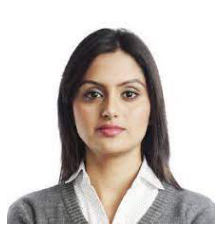

Name:  Maya
Date Of Birth: 2001-01-22
Gender:  Female
Age:  21
Phone Number:  8745985213
Parent Name:   Henry
Parent's Phone Number:  8451275623
Guardian Name:   Henry
Address:  (949) 719-9152,6 Vintage Dr,Newport Beach, California(CA), 92660


In [31]:
predict_and_display_details(direc+'5588 6445 1469.jpg')

In [24]:
df.tail()

,Aadhar Number,Name,Parent Name,Guardian Name,Date Of Birth,Gender,Age,Phone Number,Parent's Phone Number,Address
4,4544 9874 6545,Dante,Jasper,Jasper,2003-03-12,male,19,7456984123,7841256314,"(732) 727-0231,720 Bordentown Ave,South Amboy,..."
5,5587 5459 5556,Grace,. Milo,. Milo,2001-04-10,Female,21,8745698124,95845612345,"(916) 966-6504,6820 Admiral Ave,Fair Oaks, Cal..."
6,5587 2415 9546,Emmett,Oliver,Oliver,2002-09-23,male,19,9457861254,7894512345,"(808) 676-8583,94-561 Palai St,Waipahu, Hawaii..."
7,5454 5556 1246,Everett,Silas,Silas,2002-09-23,male,19,6789453124,9841245678,"(864) 595-8006,165 Meadows St,Moore, South Car..."
8,5588 6445 1469,Maya,Henry,Henry,2001-01-22,Female,21,8745985213,8451275623,"(949) 719-9152,6 Vintage Dr,Newport Beach, Cal..."


In [32]:
df

,Aadhar Number,Name,Parent Name,Guardian Name,Date Of Birth,Gender,Age,Phone Number,Parent's Phone Number,Address
0,2693 9482 7040,Adam,Atticus,Atticus,2002-02-16,male,20,7698341209,9874152345,"(731) 989-252311044 45th Hwy N,Bethel Springs, Tennessee(TN), 38315"
1,2453 3801 2517,Augustus,Asher,Asher,2002-03-26,Male,20,9030831388,7098934233,"(804) 379-47172721 Trotters Ln #103-9,Midlothian, Virginia(VA), 23113"
2,8789 8456 1121,Caspian,Jack,Jack,2002-09-12,male,19,6248977849,8745123456,"(410) 729-8737,675 Wellerburn Ave,Severna Park, Maryland(MD), 21146"
3,5546 8897 2113,Zara,Theodore,Theodore,2002-10-31,Female,19,9456178523,89845612456,"(229) 941-5995,921 Bay Rockyford Rd,Hartsfield, Georgia(GA), 31756"
4,4544 9874 6545,Dante,Jasper,Jasper,2003-03-12,male,19,7456984123,7841256314,"(732) 727-0231,720 Bordentown Ave,South Amboy, New Jersey(NJ), 08879"
5,5587 5459 5556,Grace,. Milo,. Milo,2001-04-10,Female,21,8745698124,95845612345,"(916) 966-6504,6820 Admiral Ave,Fair Oaks, California(CA), 95628"
6,5587 2415 9546,Emmett,Oliver,Oliver,2002-09-23,male,19,9457861254,7894512345,"(808) 676-8583,94-561 Palai St,Waipahu, Hawaii(HI), 96797"
7,5454 5556 1246,Everett,Silas,Silas,2002-09-23,male,19,6789453124,9841245678,"(864) 595-8006,165 Meadows St,Moore, South Carolina(SC), 29369"
8,5588 6445 1469,Maya,Henry,Henry,2001-01-22,Female,21,8745985213,8451275623,"(949) 719-9152,6 Vintage Dr,Newport Beach, California(CA), 92660"


In [42]:
a = os.listdir(di)
len(a),a[0][0]

(80, '1')

In [43]:
def make_fingerprint_folder(name,number):
    os.mkdir(name)
    for i in a:
        if number == a[0][0]:
            shutil.move(di+i,name+"/"+i)

In [45]:
make_fingerprint_folder("2693 9482 7040",'1')

In [1]:
train_dir = 'data/train'
test_dir = 'data/test'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical',seed=42)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical',seed=42)

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [7]:
import pathlib
data_dir = pathlib.Path(train_dir)
data_dir

WindowsPath('data/train')

In [8]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['2453 3801 2517', '2693 9482 7040', '5546 8897 2113',
       '5588 6445 1469', '8789 8456 1121'], dtype='<U14')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def show_random_image(directory,class_name):
    direc = directory+class_name
    random_image = random.sample(os.listdir(direc) ,1)
    image = mpimg.imread(direc + "/" + random_image[0])
    plt.imshow(image)
    plt.title(class_name)

Enter 0-4 for generating random image:-3


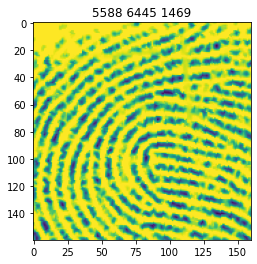

In [10]:
n=int(input("Enter 0-4 for generating random image:-"))
show_random_image(train_dir+"/",class_names[n])

In [11]:
vgg19 = tf.keras.applications.vgg19.VGG19(include_top=False,
                                          weights='imagenet',
                                         input_shape=(224,224,3))
for i in vgg19.layers:
    i.trainable = False

model = tf.keras.models.Sequential(layers=vgg19.layers)
    
#     tf.keras.layers.Conv2D(filters=32,
#                           kernel_size=3,
#                           activation='relu',
#                           input_shape=(224,224,3)),
#     tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
#      tf.keras.layers.Conv2D(filters=64,
#                           kernel_size=3,
#                           activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
#     tf.keras.layers.Conv2D(filters=64,
#                           kernel_size=3,
#                           activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
#     tf.keras.layers.Conv2D(filters=128,
#                           kernel_size=3,
#                           activation='relu'),
#      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(5,activation='softmax'))


80150528/80134624 [==============================] - 10s 0us/step


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_1=model.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
10/10 [==============================] - 48s 5s/step - loss: 0.7886 - accuracy: 0.7200 - val_loss: 0.4408 - val_accuracy: 0.8900
Epoch 2/10
10/10 [==============================] - 50s 5s/step - loss: 0.6848 - accuracy: 0.7500 - val_loss: 0.3863 - val_accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 49s 5s/step - loss: 0.5630 - accuracy: 0.8067 - val_loss: 0.4748 - val_accuracy: 0.8300
Epoch 4/10
10/10 [==============================] - 48s 5s/step - loss: 0.4718 - accuracy: 0.8433 - val_loss: 0.3837 - val_accuracy: 0.8600
Epoch 5/10
10/10 [==============================] - 48s 5s/step - loss: 0.4722 - accuracy: 0.8267 - val_loss: 0.3497 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 48s 5s/step - loss: 0.4360 - accuracy: 0.8333 - val_loss: 0.3483 - val_accuracy: 0.8900
Epoch 7/10
10/10 [==============================] - 48s 5s/step - loss: 0.4482 - accuracy: 0.8300 - val_loss: 0.2720 - val_accuracy: 0.8900
Epoch 8/10
10/10 [==

In [76]:
# Use VGG19 model
# https://www.intechopen.com/chapters/72993

In [15]:
model.save("Face-Fingerprint Recognition.h5")